In [2]:
import torch
print(torch.__version__)

2.2.2


In [3]:
!pip install torchvision

  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:0000:01m00:01
Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)


In [4]:
import torchvision

In [5]:
!pip install git+https://github.com/facebookresearch/detectron2@main

  Cloning https://github.com/facebookresearch/detectron2 (to revision main) to /private/var/folders/ll/s3gcwbbn2210b53hfksb0dk80000gn/T/pip-req-build-dxjqvxlu
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /private/var/folders/ll/s3gcwbbn2210b53hfksb0dk80000gn/T/pip-req-build-dxjqvxlu
  Resolved https://github.com/facebookresearch/detectron2 to commit 5c380fdfc62b0124204155d6be3b1016e3dadb2d
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp38-cp38-macosx_10_9_x86_64.whl size=881927 sha256=2057f97f1da9563a93fbd9c9bcbe207f2865e896b5b427967afa50848e254c01
  Stored in directory: /private/var/folders/ll/s3gcwbbn2210b53hfksb0dk80000gn/T/pip-ephem-wheel-cache-8ba28w48/wheels/77/4e/c2/cbeb54e5f805ac3892815af5c365f97ce6682802a45c445e0a
Successfully built detectron2


In [6]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2

In [7]:
import requests

image_url = "https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg"
img_data = requests.get(image_url).content
with open('oxford_street.jpg', 'wb') as handler:
    handler.write(img_data)

import os
os.stat('oxford_street.jpg')

os.stat_result(st_mode=33188, st_ino=49750771, st_dev=16777231, st_nlink=1, st_uid=501, st_gid=20, st_size=179209, st_atime=1714793547, st_mtime=1714793547, st_ctime=1714793547)

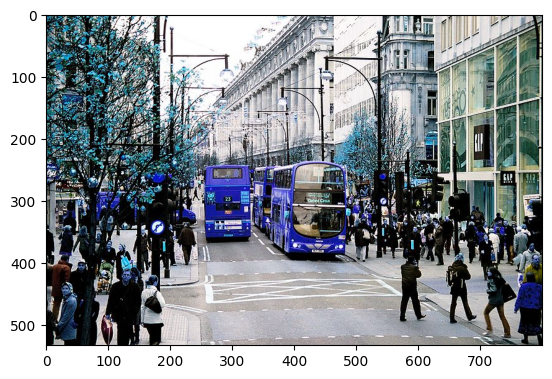

In [8]:
%matplotlib inline
im = cv2.imread("./oxford_street.jpg")
plt.imshow(im)

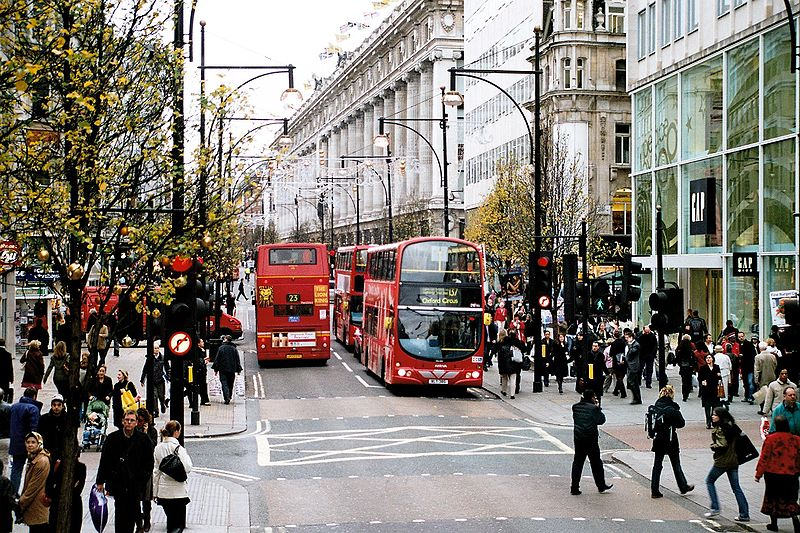

In [9]:
from IPython.display import Image
Image(filename='oxford_street.jpg') 

In [12]:
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

# I don't think the version of CUDA that I have is compatible with torch. 